In [2]:
# all imports should go here

import pandas as pd
import sys
import os
import subprocess
import datetime
import platform
import datetime

import json

import geopandas as gpd
from shapely.geometry import Point, LineString

import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sb

import  cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
print(cartopy.__version__)
print(gpd.__version__)
print(matplotlib.__version__)

0.16.0
0.3.0
2.2.2


In [4]:
%matplotlib inline

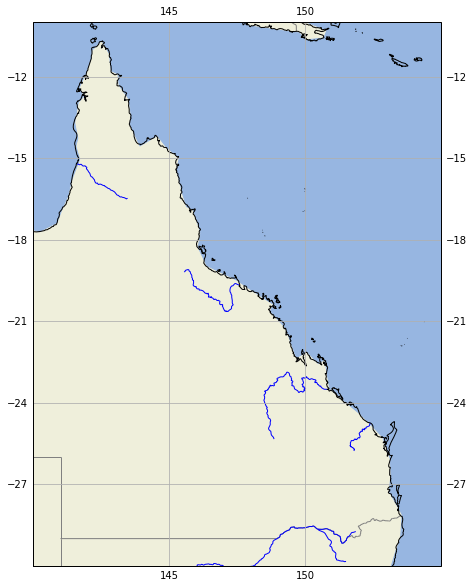

In [5]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((140, 155, -30, -10))

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)

# Create a feature for States/Admin 1 regions at 1:10m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

rivers = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='10m',
    facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(rivers, edgecolor='blue')

ax.coastlines(resolution='10m',)
ax.gridlines(draw_labels=True, xlocs=[140, 145, 150, 155])



In [6]:
loc_data = 'D:\\GoogleLocnData\\Takeout\\Location History\\Location History.json'

with open(loc_data, 'r') as fh:
    raw = json.loads(fh.read())
#end with
ld = pd.DataFrame(raw['locations'])

ld = ld[ld['activity'].notnull()].copy()

ld['ActivityType'] = [ x[0]['activity'][0]['type'] for x in ld['activity'] ]

ld['latitude'] = ld['latitudeE7']/float(1e7)
ld['longtitude'] = ld['longitudeE7']/float(1e7)

ld['timestampMsFl'] = ld['timestampMs'].astype(float)

ld['timestamp'] = ld['timestampMsFl']/1000.0

ld['datetime'] = ld['timestamp'].map(datetime.datetime.fromtimestamp)

ld = ld[ld['timestamp']>datetime.datetime(2018, 5, 31).timestamp()].copy()

ld = ld[ld['timestamp']<datetime.datetime(2018, 6, 19).timestamp()].copy()

ld = ld[ld['ActivityType']=='IN_VEHICLE'].copy()

ld['DayNo'] = [x.dayofyear for x in ld['datetime'] ] 

ld['DayNo'] = ld['DayNo'] - 150

In [7]:
geometry = [Point(xy) for xy in zip(ld['longtitude'], ld['latitude'])]

In [8]:
crs = {'init': 'epsg:4326'}
gld = gpd.GeoDataFrame(ld, crs=crs, geometry=geometry)

Text(0.5,1,'Cape York Road Trip: Wireless Coverage')

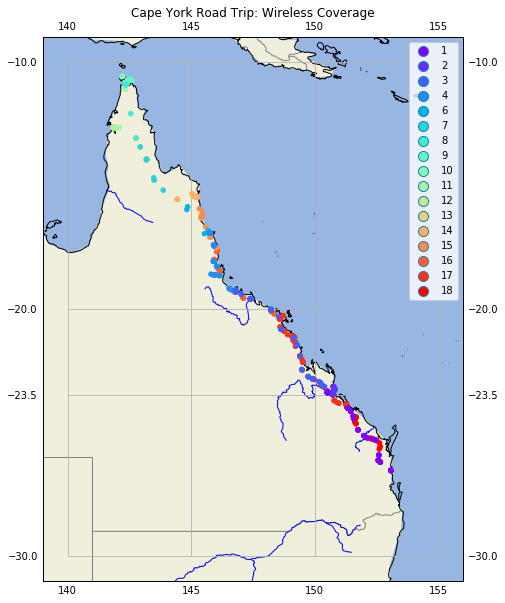

In [17]:


fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((139, 156, -31, -9))

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)

# Create a feature for States/Admin 1 regions at 1:10m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

rivers = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='10m',
    facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(rivers, edgecolor='blue')

ax.coastlines(resolution='10m',)
ax.gridlines(draw_labels=True,
             ylocs=[-10,   -20, -23.5,  -30],
            xlocs=[140, 145, 150, 155])

gld.plot(ax=ax, 
         marker='o', 
         column='DayNo', 
         cmap='rainbow', 
         markersize=20, 
         zorder=5, 
         legend=True,
         categorical=True,
)

ax.set_title(label='Cape York Road Trip: Wireless Coverage', loc='center', pad=20, )


Text(0,1,'Cape York Road Trip: Homeward Bound')

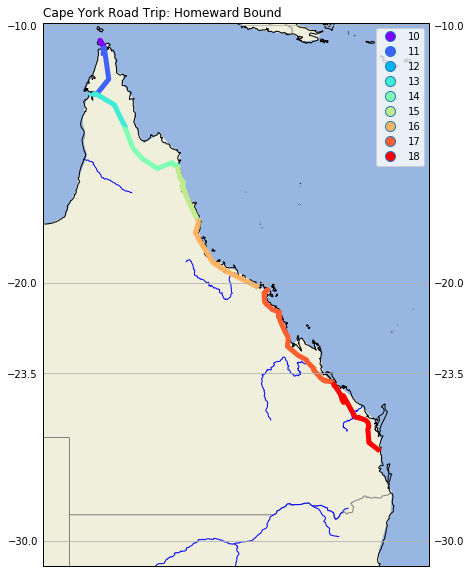

In [10]:

fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((140, 155, -31, -9.9))

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)

# Create a feature for States/Admin 1 regions at 1:10m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

rivers = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='10m',
    facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(rivers, edgecolor='blue')

ax.coastlines(resolution='10m',)
ax.gridlines(draw_labels=True, xlocs=[140,  155], ylocs=[-10,   -20, -23.5,  -30])

# Aggregate each days points into a line
gld2 = gld.groupby(['DayNo'])['geometry'].apply(lambda x: LineString(x.tolist()))
gld2 = gpd.GeoDataFrame(gld2, geometry='geometry')
gld2['DayNum'] = gld2.index

gld2[gld2['DayNum']>9].plot(ax=ax,
          column='DayNum',
          cmap='rainbow',
          legend=True,
          categorical=True,
          linewidth=5,
         )
ax.set_title(label='Cape York Road Trip: Homeward Bound', loc='left')

In [11]:
gld2 = gld.groupby(['DayNo'])['geometry'].apply(lambda x: LineString(x.tolist()))
gld2 = gpd.GeoDataFrame(gld2, geometry='geometry')
gld2['DayNum'] = gld2.index

In [12]:
gld2.head()

,geometry,DayNum
DayNo,,
1,"LINESTRING (150.510706 -23.3742811, 150.511090...",1
2,"LINESTRING (150.5142746 -23.3777848, 150.75829...",2
3,"LINESTRING (146.8031544 -19.2456282, 146.81434...",3
4,"LINESTRING (145.7794032 -16.9254844, 145.77898...",4
6,"LINESTRING (144.8582675 -15.8620409, 144.82876...",6
